# Data Cleaning
## Part 1 - Organizing Data
import data
removed sensitive information
dropped all columns that weren't variables 
renamed columns

In [1]:
#import packages
import pandas as pd
import numpy as np
#Import CSV and Hide patient Information
orig = pd.read_csv('TESTING.CSV')
orig['Name'] = "---"
orig['BD']="---"
#Remove columns that didnt pertain to variables
orig.drop(orig.columns[[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,29]], axis=1, inplace=True)
orig.drop(orig.columns[[11,15,38,39,40,41,42,43,44,45,46,49,50,51,52,53,54,55,56,57,58,59,60,61]], axis=1, inplace=True)
#rename columns in df
cols = ['TKA', 'Opioid_Naiive',
       'Used_Last_60_Days',
       'Chronic_Opioid_Use', 'Approx_Last_12hr_FAM', 'Female',
       'Pulse', 'Temp', 'Height(m)', 'Weight(kg)', 'BMI',
       'Obesity_Level', 'Age', 'Age_Range',
       'Alcohol_Abuse', 'Tobacco_Use',
       'Possible_Substance_Addiction', 'Depression',
       'Anxiety', 'Depression_and_Anxiety',
       'Other_Chronic_Pain_List', 'Other_Chronic_Pain',
       'Hyperlipidemia', 'Blood_Loss_ml', 'Tourniquet_Time_min', 'Tourniquet_Levels',
       'Complications', 'Surgeon', 'Side', 'Marital_Status', 'Children',
       'Occupation', 'Education','Race','Previous_Joint_Replacement_or_Scopy',
       'Revision',
       'Initial_Perscribed_MME','Initial_Perscribed_MME_Level',
       'Level_of_MME_Taken']
orig.columns = cols
orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 39 columns):
TKA                                    231 non-null object
Opioid_Naiive                          231 non-null object
Used_Last_60_Days                      231 non-null object
Chronic_Opioid_Use                     231 non-null object
Approx_Last_12hr_FAM                   231 non-null float64
Female                                 231 non-null object
Pulse                                  224 non-null float64
Temp                                   220 non-null float64
Height(m)                              231 non-null float64
Weight(kg)                             225 non-null float64
BMI                                    231 non-null float64
Obesity_Level                          231 non-null object
Age                                    231 non-null int64
Age_Range                              231 non-null object
Alcohol_Abuse                          230 non-null object
Tobac

In [1]:
#Count number of Values in each row: (https://datascience.stackexchange.com/questions/12645/how-to-count-the-number-of-missing-values-in-each-row-in-pandas-dataframe)
#orig['full_count'] = orig.apply(lambda x: x.count(), axis=1)
#orig.info()
#orig.Tourniquet_Levels.isnull().sum()
#orig['Hyperlipidemia'] = orig.Hyperlipidemia.fillna(0)
#null_columns=orig.columns[orig.isnull().any()]
#print(orig[orig["Alcohol_Abuse"].isnull()][null_columns].head())
#orig.Blood_Loss_ml.unique
orig.Age_Range.unique()

NameError: name 'orig' is not defined

# Part 2 - Making all data types numeric
Below are the list of variables those that are started will be included in the initial model:
* Procedure - 1 TKA, 0 THA
* *Opioid Naiive - 1 Taken Before, 0 Naiive
* *Used Last 60 Days - 1 Yes, 0 No
* *Approx_Last_12hr_FAM - continuous
* *Sex - 1 Female, 0 Male
* *Pulse
* *Temp - Continuous
* Height - Continuous
* Weight - Continuous
* BMI - Continuous
* *obesity_Level - 0 <30, 1 <35 , 2 <40, 3 >=40
* Age - Continuous
* *Age_range - 0 >=80, 1 70-79, 2 60-69, 3 50-59, 4 <50
* *Alcohol Abuse - 1 Yes, 0 No
* *Tabacco Use - 2 Yes, 1 Former, 0 No
* Possible Substance Addiction - 1 Yes, 0 No
* *Depression - 1 Yes, 0 No
* *Anxiety - 1 Yes, 0 No
* Depression_and_Anxiety - 1 Yes, 0 No
* *Other_Chronic_Pain_List - 3 Back/Shoulder Pain, 2 Arthritis, 1 Migraine, 0 None
* Other_Chronic_Pain - 1 Yes, 0 No
* *Hyperlipidemia - 1 Yes, 0 No
* *blood_loss(ml) - continuous
* Tourniquet_time(min) continuous
* *Tourniquet_Levels 0 - THA, 1 <45min, 2 45-89min, 3>=90min
* Complicatons <-- remove not enough diverse data
* *Side - 1 Right, 0 Left
* *Marital_Status - 0 Married, 1 Widowed, 2 Divorced, 3 Single
* *Children - Continuous
* Occupation <-- remove not enough data
* Education <-- remove not enough data
* Race <-- Remove not enough data
* *Previous_Joint_Replacement_or_Scopy - 1 Yes, 0 No
* *Revision - 1 Yes, 0 No
* *Initial_Perscribed_MME_Level
        * 3 Levels: 0 low (<75 MMEs) , 1 medium (<225 MMEs), 2 high (>225 MMEs)
        * 2 Levels: 0-Low (<300 MMEs) , 1-High (>300 MMEs)

Our Prediction variable:
* Level_of_MME_Taken - 0 low, 1 medium, 2 high

In [2]:
orig['Opioid_Naiive'] = orig['Opioid_Naiive'].map({'No': 1,'Yes':0,"no":1})
orig['Used_Last_60_Days'] = orig['Used_Last_60_Days'].map({'No': 0,'Yes':1,"no":0," No":0})
orig['Chronic_Opioid_Use'] = orig['Chronic_Opioid_Use'].map({'No': 0,'Yes':1,"no":0,"nO":0})
orig['TKA'] = orig['TKA'].map({'TKA': 1,'THR':0, 'THA': 0,"Tha":0,"Warren Moseberry TKA":1})
orig['Female'] = orig['Female'].map({'F': 1,'M':0, 'f': 1})
orig['Obesity_Level'] = orig['Obesity_Level'].map({'Healthy Weight': 0,'Obese':1, 'Very Obese': 2, 'Severly Obese':3})
#pd.to_numeric(orig.Obesity_Level)
orig['Age_Range'] = orig['Age_Range'].map({'50-59': 1,'<50':1, '60-69': 1, '70-79':0, "80+":0})
orig['Alcohol_Abuse'] = orig.Alcohol_Abuse.map( lambda x: 0 if x == 'No' else ( 1 if x=="Yes" else (0 if x=="no" else ( 0 if x =="nO" else ( 0 if x == "Former" else 0)))))
orig['Tobacco_Use'] = orig['Tobacco_Use'].map({'No': 0,'Yes':2,"former":1,"nO":0,"Former":1})
orig['Possible_Substance_Addiction'] = orig['Possible_Substance_Addiction'].map({'No': 0,'Yes':1})
orig['Depression'] = orig['Depression'].map({'No': 0,'Yes':1,"no":0})
orig['Anxiety'] = orig['Anxiety'].map({'No': 0,'Yes':1,"no":0,'yes':1})
orig['Depression_and_Anxiety'] = orig['Depression_and_Anxiety'].map({'No': 0,'Yes':1,"no":0,'yes':1})
orig['Other_Chronic_Pain_List'] = orig['Other_Chronic_Pain_List'].map({'Back/Shoulder Pain': 3,'Arthritis':2,"Foot Pain":2,'Migraine':1,"Migrane":1,"No":0,"Osteoporosis":2})
orig['Other_Chronic_Pain'] = orig['Other_Chronic_Pain'].map({'Yes': 1,'No':0,"Foot Pain":1,'Migraine':1,"Migrane":1,"No":0,"Osteoporosis":1})
orig['Hyperlipidemia']=orig.Hyperlipidemia.map( lambda x: 1 if x == 'Hyperlipidemia' else 0)
orig['Tourniquet_Levels'] = orig['Tourniquet_Levels'].map({'0': 0,'45-89min':2,"<45min":1,">90min":3})
orig['Side'] = orig['Side'].map({'Right': 0,'Left':1,"Both":1,"left":1,"right":0})
orig['Marital_Status'] = orig['Marital_Status'].map({'Married': 0,'Widowed':1,"Divorced":2,"Single":3,"Domestic":0})
orig.Children.apply(str)
orig['Children'] = orig.Children.map(lambda x: 1 if x=="1" else ( 1 if x=="2" else ( 1 if x=="3" else ( 1 if x=="4" else ( 1 if x=="5" else ( 1 if x=="6" else ( 1 if x=="7" else (1 if x=="Yes" else 0) ) ))))))
orig['Race'] = orig['Race'].map({'White': 0,'wHITE':0,"white":0,"Black":1,"American Indian":2})
orig['Previous_Joint_Replacement_or_Scopy'] = orig['Previous_Joint_Replacement_or_Scopy'].map({'Yes': 1,'No':0})
orig['Revision'] = orig['Revision'].map({'Yes': 1,'No':0, "NO":0})
orig.Initial_Perscribed_MME_Level.apply(str)
orig['Initial_Perscribed_MME_Level'] = orig['Initial_Perscribed_MME_Level'].map({'High': 2,'Medium':1, "Low":0})
orig['Level_of_MME_Taken'] = orig['Level_of_MME_Taken'].map({'High': 1, "Low":0})


# Notes on Skitlearn Selecting data to model


In [82]:
#	Predict confidence scores for samples.
decision_function(X)
#	Convert coefficient matrix to dense array format.
densify()
#	Fit the model according to the given training data.
fit(X, y[, sample_weight])
#	Get parameters for this estimator.
get_params([deep])
#	Predict class labels for samples in X.
predict(Xlicon)
#	Log of probability estimates.
predict_log_proba(X)
#	Probability estimates.
predict_proba(X)
#	Returns the mean accuracy on the given test data and labels.
score(X, y[, sample_weight])
#	Set the parameters of this estimator.
set_params(**params)

sparsify()


dropped_cols=['Height(m)', 'Weight(kg)', 'BMI', "Anxiety",'Age_Range', 
       'Possible_Substance_Addiction','Depression_and_Anxiety',
        'Tourniquet_Time_min', 
       'Complications', 'Surgeon',"Children", "Marital_Status", "Pulse",
       'Occupation', 'Education','Race', "Side", "Female", "Blood_Loss_ml", "Opioid_Naiive",
        "Hyperlipidemia", "Revision", "Alcohol_Abuse", "Temp",'Previous_Joint_Replacement_or_Scopy',
       "Level_of_MME_Taken",'Initial_Perscribed_MME_Level', 'Other_Chronic_Pain_List'  ]

SyntaxError: invalid syntax (<ipython-input-82-17b3c599ab02>, line 6)

In [53]:
import scipy.stats as stats

columns_list = ['Female','Age_Range', 'Marital_Status', 'Children','TKA','Blood_Loss_ml', 
                'Tourniquet_Levels','Revision','Approx_Last_12hr_FAM', #'Pulse', 'Temp', 
                'Obesity_Level', 'Chronic_Opioid_Use', 'Used_Last_60_Days','Opioid_Naiive',
                'Alcohol_Abuse', 'Tobacco_Use','Depression', 'Other_Chronic_Pain','Anxiety']
    
                    
for col in columns_list :
    #print (orig[col].value_counts())
    tallys = orig.groupby(['Level_of_MME_Taken'])[col].value_counts()
    print(tallys)
#np.round(orig.describe(), 2).T[['count','mean', 'std', 'min', 'max']]
print(orig.groupby(['Level_of_MME_Taken'])['Blood_Loss_ml'].mean())
print(orig.groupby(['Level_of_MME_Taken'])['Approx_Last_12hr_FAM'].mean())
print(orig.groupby(['Level_of_MME_Taken'])['Pulse'].mean())
orig.groupby(['Level_of_MME_Taken'])['Temp'].mean()


Level_of_MME_Taken  Female
0                   1         34
                    0         31
1                   1         98
                    0         68
Name: Female, dtype: int64
Level_of_MME_Taken  Age_Range
0                   1             43
                    0             22
1                   1            127
                    0             39
Name: Age_Range, dtype: int64
Level_of_MME_Taken  Marital_Status
0                   0                  46
                    2                  10
                    3                   5
                    1                   4
1                   0                 126
                    2                  16
                    3                  14
                    1                  10
Name: Marital_Status, dtype: int64
Level_of_MME_Taken  Children
0                   1           37
                    0           28
1                   1           91
                    0           75
Name: Children, dtype: int64
Le

Level_of_MME_Taken
0    98.071407
1    98.181280
Name: Temp, dtype: float64

# Part 3 - Attribute Selection

In [23]:
# Recursive Feature Elimination
#http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

import scipy
from sklearn.feature_selection import RFE

#All dropped columns din't have enough data to be significant. 
    #Inital prescribed was removed because this can change from the physician. 
    #Used last 60 days was removed because it is correlated with Chronic Opioid use. It was found from RFE of 3 attributes that Chionic opioid use was ranked higher than used last 60 days.
    #TKA was removed because it is highly correlated with tourniqout time. when RFE was 5 Time>TKA
    # Revison and Previoud surgeries were also remove since they correlated with chonic opioid use.
dropped_cols=['Weight(kg)', 'Tourniquet_Time_min', "Alcohol_Abuse",
       'Complications', 'Surgeon', "Marital_Status", "Pulse",
       'Occupation', 'Education','Race', "Side", "Blood_Loss_ml", 'Initial_Perscribed_MME',
       "Temp", "Level_of_MME_Taken",'Initial_Perscribed_MME_Level','Used_Last_60_Days', 'TKA' ]

X= orig.drop((dropped_cols),axis=1)
y=orig.Level_of_MME_Taken
y.shape
y = y.values.reshape(231,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=123, stratify=y)

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 1)
rfe = rfe.fit(X_train,y_train)
# summarize the selection of the attributes
print(X_train.columns)
print(rfe.score(X_train,y_train))
print(rfe.support_)
print(rfe.ranking_)
print(rfe.get_support)

#Selected attributes are 'Chronic_Opioid_Use','Obesity_Level','Alcohol_Abuse','Depression','Other_Chronic_Pain','Tourniquet_Levels',"Previous_Joint_Replacement_or_Scopy"
    #However using knowledge from the liturature, rankings, and trial and error with modeling we found that removing , "Previous_Joint_Replacement_or_Scopy" adn replaced it with "Age_Range" resulted in our best model accuracy.

Index(['Opioid_Naiive', 'Chronic_Opioid_Use', 'Approx_Last_12hr_FAM', 'Female',
       'Height(m)', 'BMI', 'Obesity_Level', 'Age', 'Age_Range', 'Tobacco_Use',
       'Possible_Substance_Addiction', 'Depression', 'Anxiety',
       'Depression_and_Anxiety', 'Other_Chronic_Pain_List',
       'Other_Chronic_Pain', 'Hyperlipidemia', 'Tourniquet_Levels', 'Children',
       'Previous_Joint_Replacement_or_Scopy', 'Revision'],
      dtype='object')
0.7167630057803468
[False  True False False False False False False False False False False
 False False False False False False False False False]
[17  1 20 15 11 19  8 18 10  7  6  2 13 14 16  3 12  4 21  5  9]
<bound method SelectorMixin.get_support of RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_sele

c:\users\vronn\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Part 4 -  Building A Logistic Regression Model with Cross Validation

In [51]:
# Sources: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
    #http://scikit-learn.org/stable/modules/cross_validation.html
    #http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    #https://stats.stackexchange.com/questions/52274/how-to-choose-a-predictive-model-after-k-fold-cross-validation
    #http://blog.kaggle.com/2015/06/29/scikit-learn-video-7-optimizing-your-model-with-cross-validation/
# Necessary imports: 

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn.linear_model import LogisticRegression as logReg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import svm
#from regressors import stats
import statsmodels.formula.api as smf



orig['Blood_Loss_ml'] = orig.Blood_Loss_ml.fillna(orig.Blood_Loss_ml.mean())
orig['Pulse'] = orig.Pulse.fillna(orig.Pulse.mean())
orig['Temp'] = orig.Temp.fillna(orig.Temp.mean())
orig['Previous_Joint_Replacement_or_Scopy'] = orig.Previous_Joint_Replacement_or_Scopy.fillna(0)
orig['Revision'] = orig.Revision.fillna(0)
orig.to_pickle("ProcessedTJR.pkl")

#In the Model
    #'Chronic_Opioid_Use','Obesity_Level','Depression',
    #'Other_Chronic_Pain','Tourniquet_Levels', 'Age_Range',"'Previous_Joint_Replacement_or_Scopy',
   

       

dropped_cols=["TKA",'Height(m)', 'Weight(kg)', 'BMI', "Anxiety", 'Possible_Substance_Addiction','Depression_and_Anxiety',
        'Tourniquet_Time_min', 'Complications', 'Surgeon',"Children", "Marital_Status", "Pulse",
       'Occupation', 'Education','Race', "Side", "Female", "Blood_Loss_ml", "Opioid_Naiive",
        "Hyperlipidemia", "Revision", "Temp","Alcohol_Abuse",
       "Level_of_MME_Taken",'Initial_Perscribed_MME_Level', 'Other_Chronic_Pain_List', 
        'Used_Last_60_Days', 'Approx_Last_12hr_FAM',  'Initial_Perscribed_MME', 'Age' ]

X= orig.drop((dropped_cols),axis=1)
y=orig.Level_of_MME_Taken
y.shape
y = y.values.reshape(231,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123, stratify=y)
estimator = Pipeline([("logistic",logReg(random_state = 123))])
model = estimator.fit(X_train,y_train)
predictions = estimator.predict(X_test)
ConfScores = estimator.decision_function(X_test)


## Original model
print("LOGISTIC MODEL")
print ('R-Squared Score:' , model.score(X_test, y_test))
print ("y_pred: ", predictions)
print ("y_actual:", np.transpose(y_test))
print ("accuracy: ", accuracy_score(y_test,predictions)) # results 78% accuracy
print ("ConfScores of Predicted: ", ConfScores[0:5])
coef = estimator.steps[0][1].coef_
intercept = estimator.steps[0][1].intercept_
print("Beta_0: ", intercept)
n=1
for num in coef[0] :
    print ("Beta_",n,":", num)
    n = n+1
print("X_Predictors: ", X.columns.tolist())

# Perform 10-fold cross validation
print ("")
print("CROSS-VALIDATION")
clf = make_pipeline(preprocessing.StandardScaler(model), svm.SVC(C=1))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print ('Cross-validated scores:', scores)
#Average Cross Validation scores
print("Average Cross-Scores:", np.mean(scores))
print("Accuracy of 10 random splits: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

df = X_test.append([y_test,predictions,ConfScores])
df.to_csv("TestData.csv")


# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(model, x, y))

#coef_pval:
# [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.22512372e-09
# 9.17373066e-10 0.00000000e+00 0.00000000e+00 0.00000000e+00
# 2.02406076e-08]

ModuleNotFoundError: No module named 'statsmodels'

In [52]:
import statsmodels

ModuleNotFoundError: No module named 'statsmodels'

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=103, stratify=y)
# Create base rate model
def base_rate_model(X) :
    y = np.ones(X.shape[0])
    return y
y_base_rate = base_rate_model(X_train)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.3f" % accuracy_score(y_train, y_base_rate))

# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
#model = LogisticRegression(penalty='l2', C=1)
model = Pipeline([("imputer", Imputer(#missing_values="NaN",
                                          strategy="mean",
                                          axis=0)),
                      ("logistic",LogisticRegression(penalty='l2', C=1))])
                      #("forest", RandomForestRegressor(random_state=0,
                      #                                 n_estimators=100))])
model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

from sklearn import tree
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = Pipeline([("imputer", Imputer(#missing_values="NaN",
                                          strategy="mean",
                                          axis=0)),
                      ('dtImputer( #missing_values="NaN", strategy="mean", axis=0)),ree',dtree)])
dtree.fit(X_train,y_train)
print ("Decision Tree accuracy is %2.2f" % accuracy_score(y_test, dtree.predict(X_test)))


impute = Imputer(strategy="mean",axis=0).fit(X_train)
X_train = impute.transform(X_train)
X_test = impute.transform(X_test)

# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

Base rate accuracy is 0.719
Logistic accuracy is 0.74
Decision Tree accuracy is 0.74
AUC: 0.726 (0.106)


c:\users\vronn\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vronn\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vronn\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vronn\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:578: D

In [26]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
#SOurces: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))


print ("\n\n ---Logistic Model---")
logis = LogisticRegression(class_weight ="balanced")
logis.fit(X_train, y_train)
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))


# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))
print ("Decision Tree accuracy is %2.2f" % accuracy_score(y_test, dtree.predict(X_test)))


# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))
print ("Random Forest accuracy is %2.2f" % accuracy_score(y_test, rf.predict(X_test)))


# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))
print ("AdaBoost accuracy is %2.2f" % accuracy_score(y_test, ada.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        10
          1       0.71      1.00      0.83        25

avg / total       0.51      0.71      0.60        35



 ---Logistic Model---
Logistic AUC = 0.73
             precision    recall  f1-score   support

          0       0.54      0.70      0.61        10
          1       0.86      0.76      0.81        25

avg / total       0.77      0.74      0.75        35

Logistic accuracy is 0.74


 ---Decision Tree Model---
Decision Tree AUC = 0.76
             precision    recall  f1-score   support

          0       0.53      0.80      0.64        10
          1       0.90      0.72      0.80        25

avg / total       0.80      0.74      0.75        35

Decision Tree accuracy is 0.74


c:\users\vronn\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\vronn\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vronn\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:54: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




 ---Random Forest Model---
Random Forest AUC = 0.70
             precision    recall  f1-score   support

          0       0.55      0.60      0.57        10
          1       0.83      0.80      0.82        25

avg / total       0.75      0.74      0.75        35

Random Forest accuracy is 0.74


c:\users\vronn\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




 ---AdaBoost Model---
AdaBoost AUC = 0.61
             precision    recall  f1-score   support

          0       0.60      0.30      0.40        10
          1       0.77      0.92      0.84        25

avg / total       0.72      0.74      0.71        35

AdaBoost accuracy is 0.74


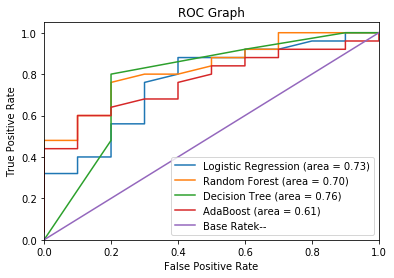

In [29]:
# Create ROC Graph
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()